**Ван Чэнь  M08**

+Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

+Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блокнот с анализом этих данных можно найти тут.
Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

+Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

+Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

+Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).

+Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных
.

+(+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.

+(+3 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

数据可以在这里[找到](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease)

Данные можно найти [здесь](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease).

In [88]:
!wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2023-11-19 18:51:47--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 172.67.129.58, 104.21.1.127, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|172.67.129.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘simhei.ttf’

simhei.ttf          100%[===================>]   9.58M  15.9MB/s    in 0.6s    

2023-11-19 18:51:48 (15.9 MB/s) - ‘simhei.ttf’ saved [10050870/10050870]



# **EDA**

age: 该朋友的年龄

sex: 该朋友的性别 (1 = 男性, 0 = 女性)

cp: 经历过的胸痛类型（值1：典型心绞痛，值2：非典型性心绞痛，值3：非心绞痛，值4：无症状）

trestbps: 该朋友的静息血压（入院时的毫米汞柱）

chol: 该朋友的胆固醇测量值，单位 ：mg/dl

fbs: 人的空腹血糖（> 120 mg/dl，1=真；0=假）

restecg: 静息心电图测量（0=正常，1=患有ST-T波异常，2=根据Estes的标准显示可能或确定的左心室肥大）

thalach: 这朋友达到的最大心率

exang: 运动引起的心绞痛（1=有过；0=没有）

oldpeak: ST抑制，由运动引起的相对于休息引起的（“ ST”与ECG图上的位置有关。这块比较专业，可以点这个看一个解读）

slope: 最高运动ST段的斜率（值1:上坡，值2:平坦，值3:下坡）

ca: 萤光显色的主要血管数目（0-4）

thal: 一种称为地中海贫血的血液疾病（3=正常；6=固定缺陷；7=可逆缺陷）

target: 心脏病（0=否，1=是）


возраст: возраст друга

пол: пол друга (1 = мужчина, 0 = женщина)

cp: тип боли в груди (значение 1: типичная стенокардия, значение 2: атипичная стенокардия, значение 3: неангинальная, значение 4: бессимптомная)

АД в покое: артериальное давление в покое (мм рт. ст. при поступлении)

chol: уровень холестерина у пациента, в мг/дл

fbs: уровень сахара в крови натощак (> 120 мг/дл, 1=истина; 0=ложь)

restecg: ЭКГ покоя (0=норма, 1=наличие аномалии ST-T волн, 2=демонстрация вероятной или определенной гипертрофии левого желудочка по критериям Эстеса)

thalach: максимальная частота сердечных сокращений, достигнутая данным товарищем

exang: стенокардия, вызванная физической нагрузкой (1=была; 0=не было)

oldpeak: подавление ST, вызванное физической нагрузкой, в отличие от вызванного отдыхом ("ST" означает положение на ЭКГ-грамме). Это более специализированный показатель, нажмите на него, чтобы увидеть интерпретацию)

slope: наклон самого высокого сегмента ST (значение 1: подъем, значение 2: ровный, значение 3: спуск)

ca: количество крупных кровеносных сосудов, окрашенных флуоресцентно (0-4)

thal: заболевание крови, называемое талассемией (3=норма; 6=фиксированный дефект; 7=обратимый дефект)

target: болезнь сердца (0=нет, 1=да)

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve,average_precision_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')
from matplotlib.font_manager import fontManager
font_path = 'simhei.ttf'
font_prop = fontManager.addfont(font_path)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [90]:
heart = pd.read_csv('heart.csv')
# 查看一下数据
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [91]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


从结果可以看出：
（1）一共303条信息，这是个小数据集
（2）一共12个特征，其中11个整型数据，1个浮点型数据
（3）所有数据均完整，无缺失


Как видно из результатов:
(1) Всего имеется 303 сообщения, что является небольшим набором данных
(2) Всего имеется 12 признаков, из которых 11 являются целочисленными данными и 1 - данными с плавающей точкой
(3) Все данные полные, без пропусков

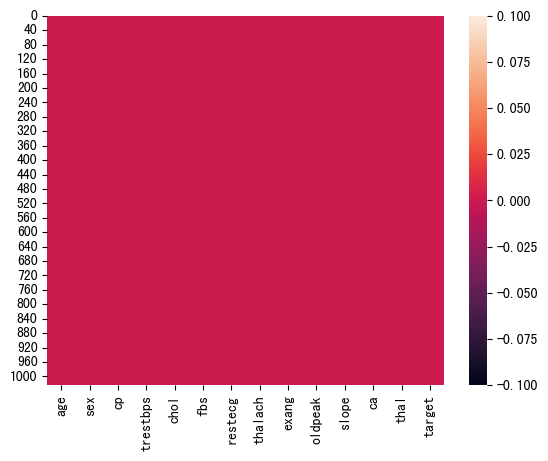

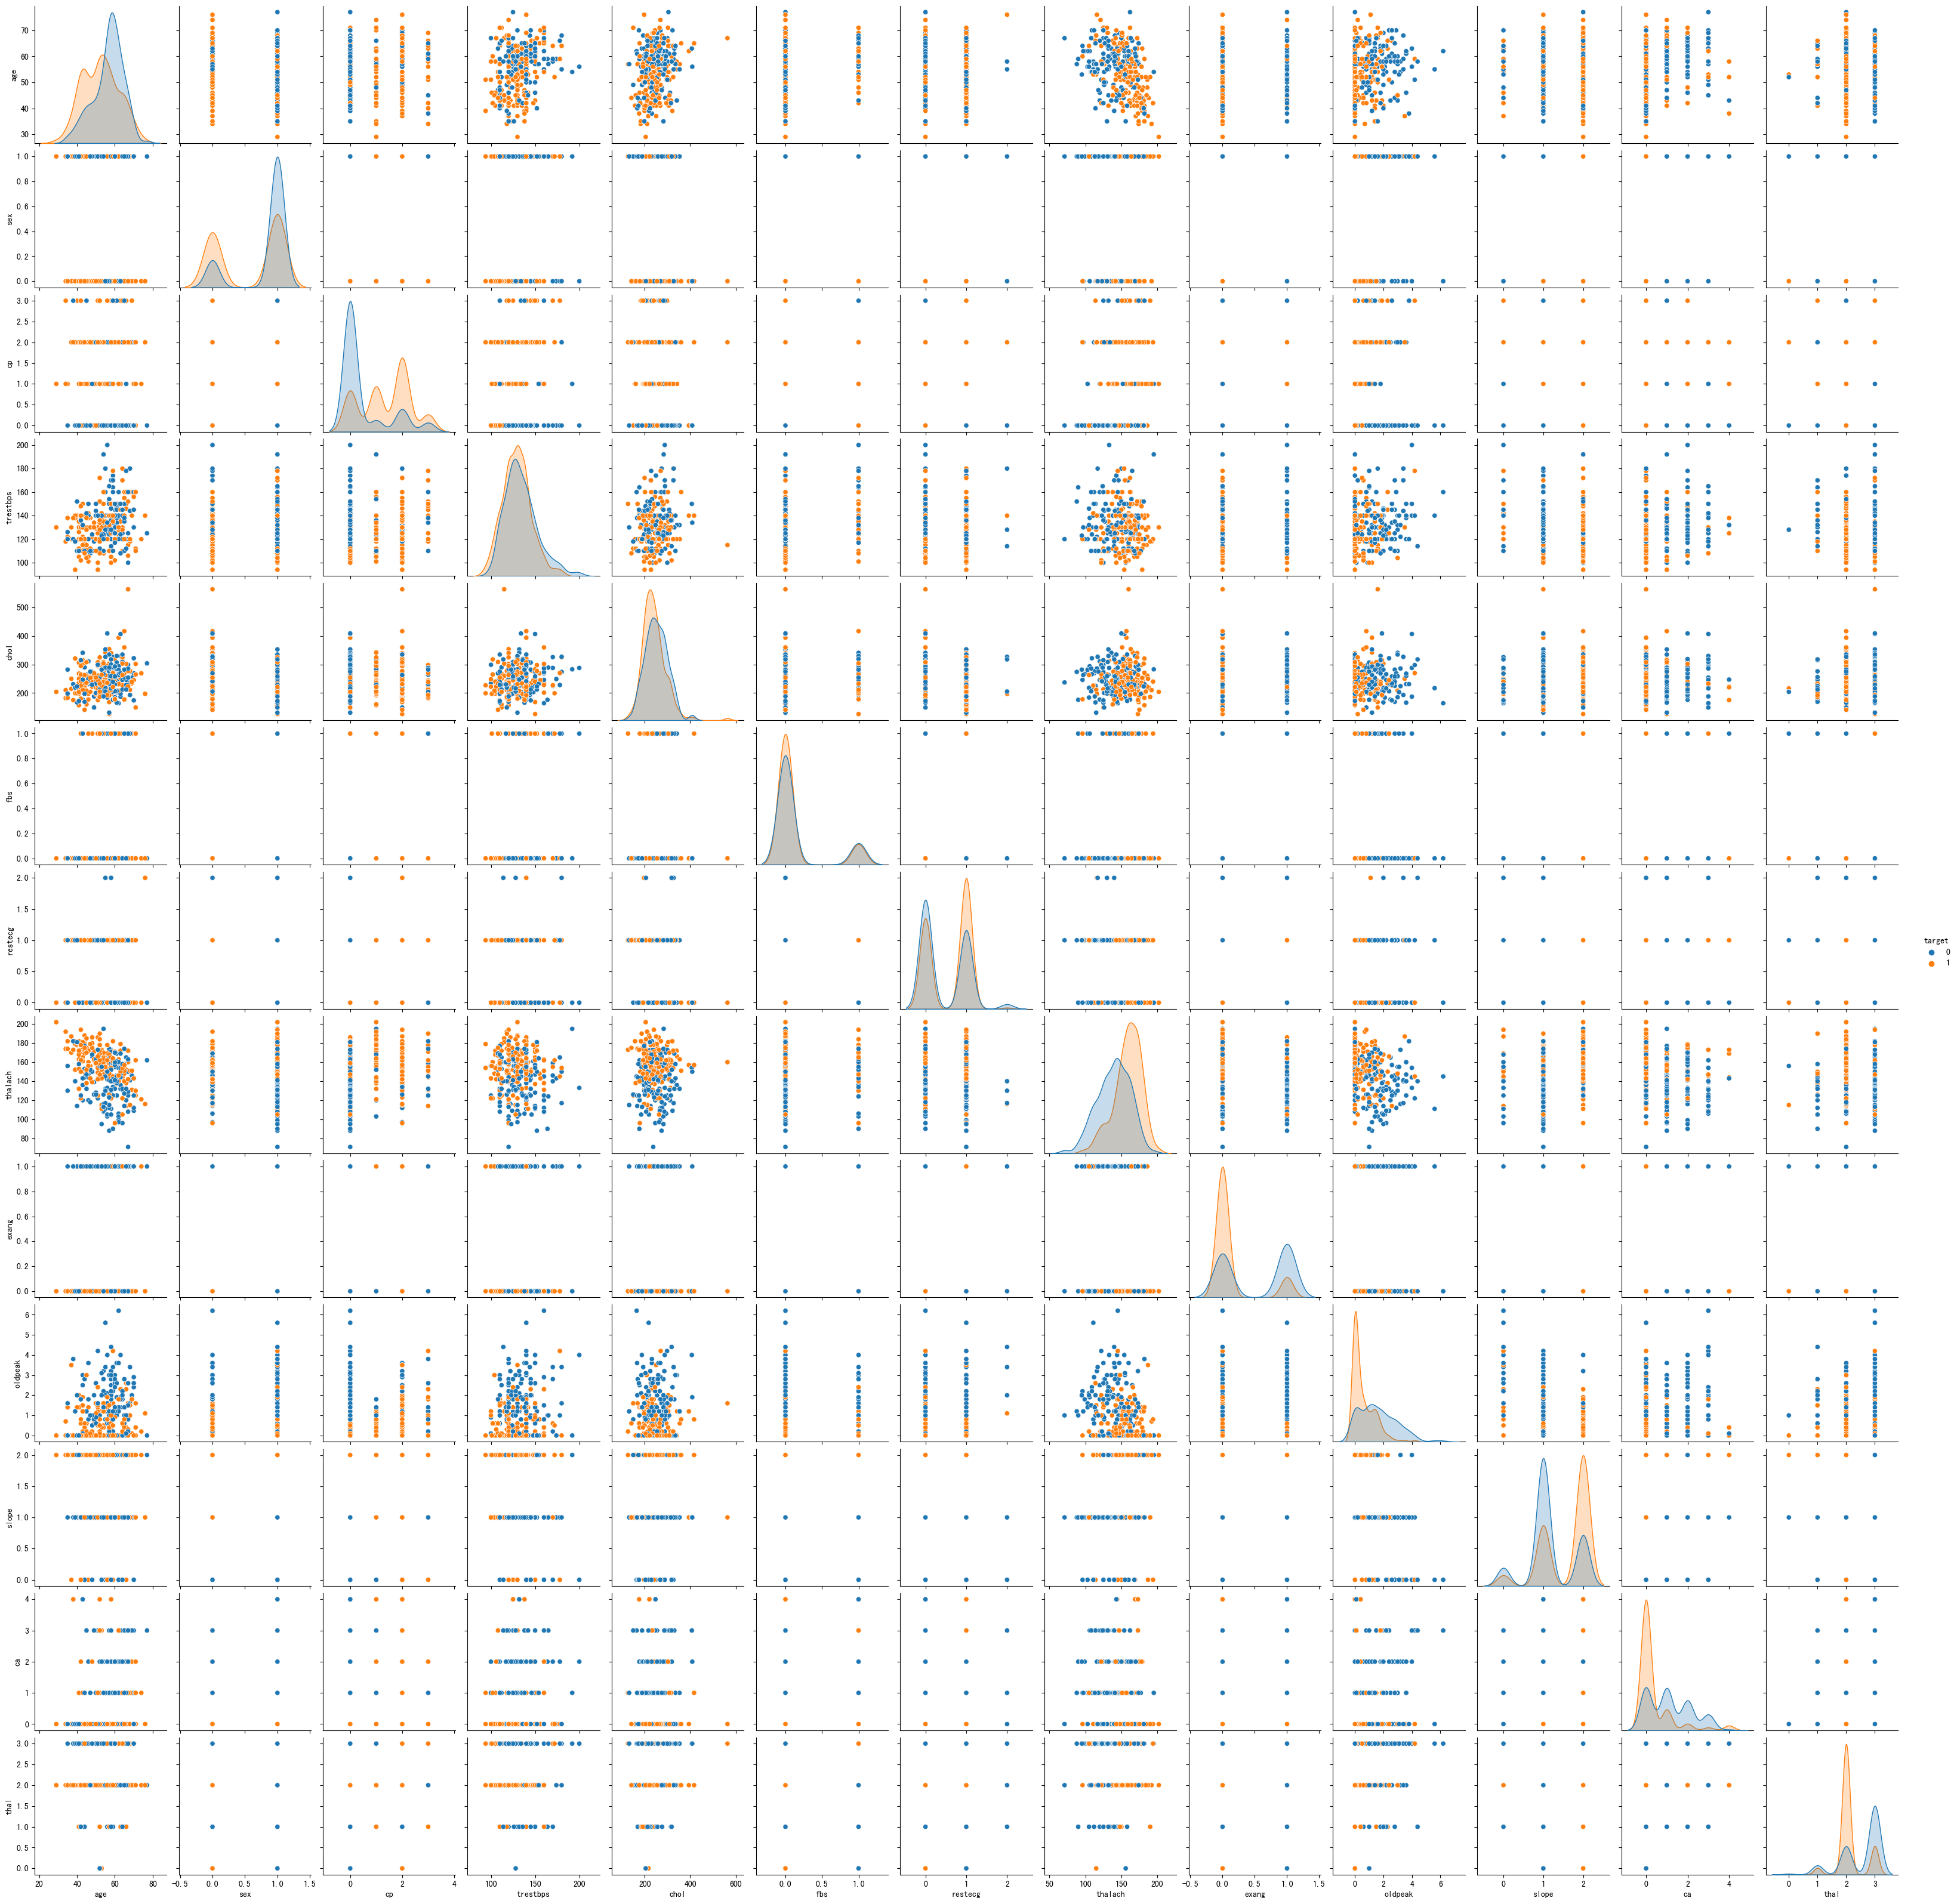

In [92]:
sns.heatmap(heart.isnull())
plt.show()
sns.pairplot(heart,hue='target')
plt.show()

与年龄的关系

Взаимосвязь с возрастом

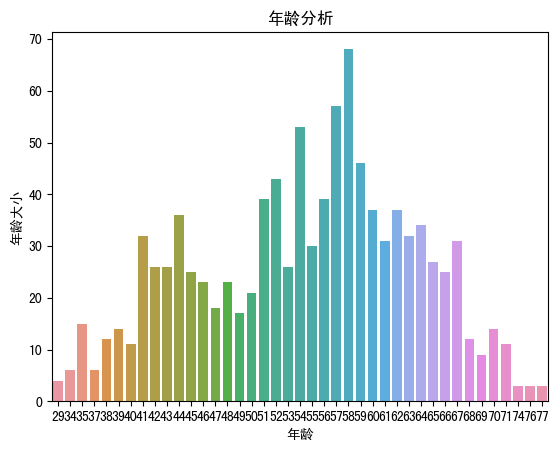

In [93]:
heart['age'].value_counts()
sns.barplot(x=heart.age.value_counts().index,y=heart.age.value_counts().values)
plt.xlabel('年龄')
plt.ylabel('年龄大小')
plt.title('年龄分析')
plt.show()


最小年龄: 29
最大年龄: 77
平均年龄: 54.43
old ages       549
middle ages    419
young ages      57
Name: age_states, dtype: int64


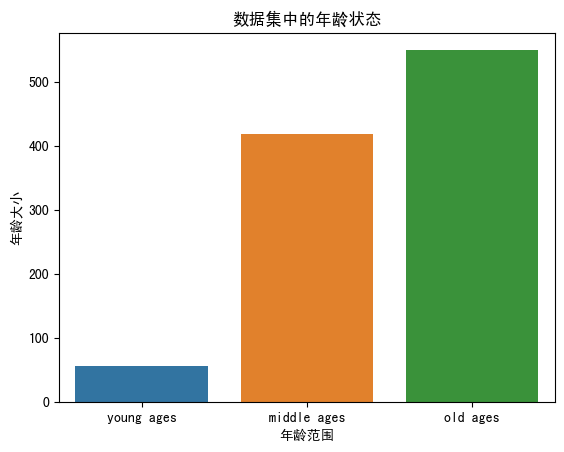

In [94]:
# 查看年龄列的最大值、最小值以及平均值
# Просмотр максимального, минимального и среднего значения столбцов возраста
minage = min(heart.age)
maxage = max(heart.age)
meanage = round(heart.age.mean(),2)
print('最小年龄:',minage)
print('最大年龄:',maxage)
print('平均年龄:',meanage)
# 将连续变量年龄转换成分类变量年龄的状态
# Государства, преобразующие непрерывную переменную возраст в категориальную переменную возраст
heart['age_states']=0
heart['age_states'][(heart['age']>=29)&(heart['age']<40)]='young ages'
heart['age_states'][(heart['age']>=40)&(heart['age']<55)]='middle ages'
heart['age_states'][(heart['age']>=55)&(heart['age']<=77)]='old ages'
# 查看各年龄段的样本数量
# Количество просмотренных образцов для каждой возрастной группы
print(heart['age_states'].value_counts())
sns.countplot(x='age_states',data=heart,order=['young ages','middle ages','old ages'])
plt.xlabel('年龄范围')
plt.ylabel('年龄大小')
plt.title('数据集中的年龄状态')
plt.show()


1    713
0    312
Name: sex, dtype: int64


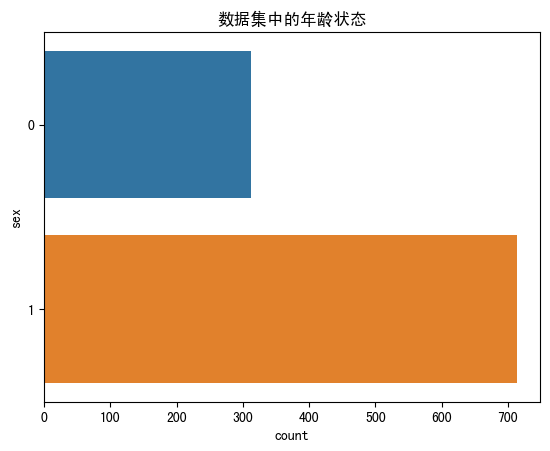

In [95]:
# 性别样本数据数据占比 0代表女性 1代表男性
# Пол Выборка Данные Процент 0 для женщин 1 для мужчин
print(heart['sex'].value_counts())
sns.countplot(y='sex',data=heart)
plt.title('数据集中的年龄状态')
plt.show()


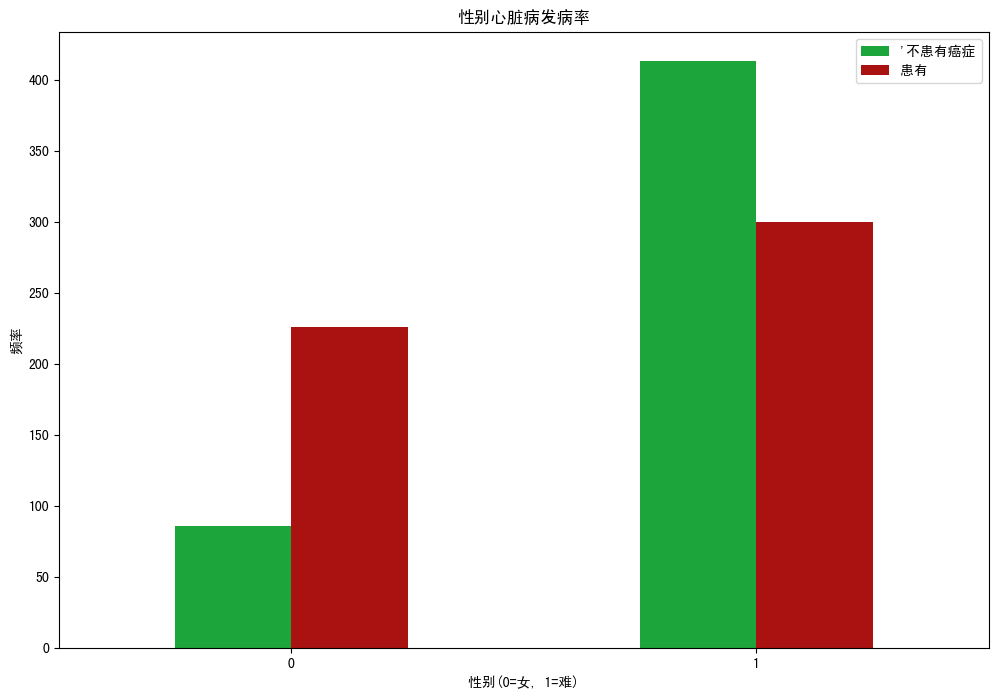

In [96]:
# 列名代表是否换心脏病 行名代表性别
# Названия столбцов отражают наличие или отсутствие изменений в сердечно-сосудистых заболеваниях Названия строк отражают пол
pd.crosstab(heart['sex'],heart['target'])
# 性别与是否患有心脏病的关系 0代表女性；1代表男性
# Взаимосвязь между полом и наличием сердечно-сосудистых заболеваний 0 для женщин; 1 для мужчин
pd.crosstab(heart['sex'],heart['target']).plot(kind="bar",figsize=(12,8),color=['#1CA53B','#AA1111'])
plt.title('性别心脏病发病率')
plt.xlabel('性别(0=女, 1=难)')
plt.xticks(rotation=0)
plt.legend(["'不患有癌症","患有"])
plt.ylabel('频率')
plt.show()


Выдает распределение по полу и заболеваниям, где женщины выделены желтым цветом, а мужчины - синим.

Первая круговая диаграмма относится к отсутствию заболеваний, вторая - к заболеваниям

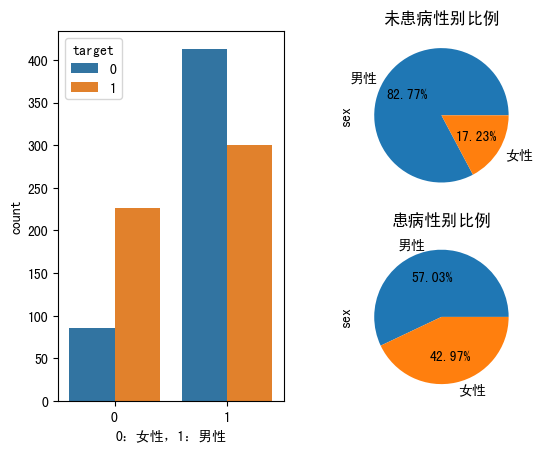

In [97]:
# 性别和患病的分布
# Распределение по полу и заболеванию
ax1 = plt.subplot(121)
ax = sns.countplot(x="sex",hue='target',data=heart,ax=ax1)
ax.set_xlabel("0：女性，1：男性")

ax2 = plt.subplot(222)
heart[heart['target'] == 0].sex.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['男性','女性'],ax=ax2)
ax2.set_title("未患病性别比例")

ax2 = plt.subplot(224)
heart[heart['target'] == 1].sex.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['男性','女性'],ax=ax2)
ax2.set_title("患病性别比例")
plt.show()


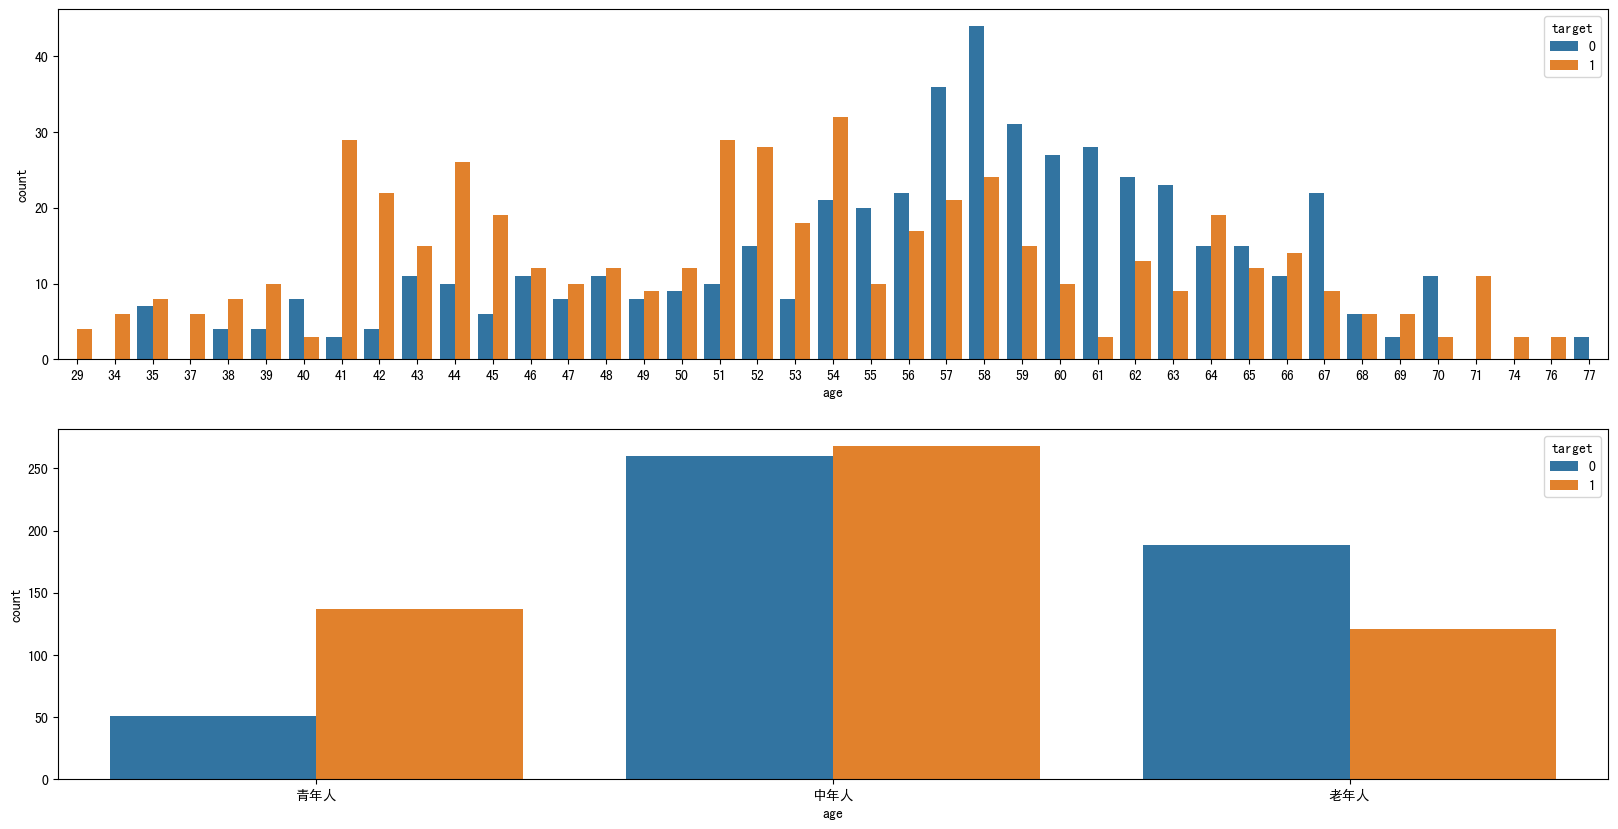

In [98]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
sns.countplot(x="age",hue="target",data=heart,ax=axes[0])

# 0-45：青年人，45-59：中年人，60-100：老年人
# 0-45: молодые люди, 45-59: люди среднего возраста, 60-100: пожилые люди
age_type = pd.cut(heart.age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['青年人','中年人','老年人'])
age_target_df = pd.concat([age_type,heart.target],axis=1)
sns.countplot(x="age",hue='target',data=age_target_df)
plt.show()


 心率和年龄也有一定的关系，可以结合考察心脏病，心率，年龄

Существует также связь между частотой сердечных сокращений и возрастом, которую можно рассматривать в сочетании с сердечно-сосудистыми заболеваниями, частотой сердечных сокращений и возрастом #

In [99]:

thaDf = heart[['thalach','target']]
thaDf['age_range'] = pd.cut(heart['age'],bins=[0,18,40,60,100],
                           labels=['儿童','青年','中年','老年'],
                            include_lowest=True,right=False)
thaDf.head()

,thalach,target,age_range
0,168,0,中年
1,155,0,中年
2,125,0,老年
3,161,0,老年
4,106,0,老年


年龄和最大心率的关系
Взаимосвязь между возрастом и максимальной частотой сердечных сокращений

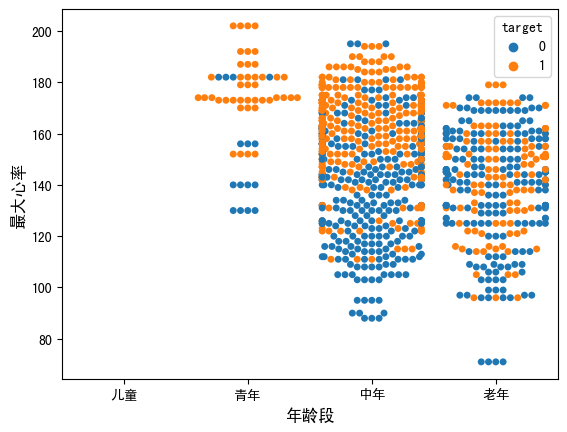

In [100]:
sns.swarmplot(data =thaDf, x='age_range',y='thalach', hue='target')
plt.xlabel('年龄段', fontsize=12)
plt.ylabel('最大心率',fontsize=12)
plt.show()

Тип боли в груди (0=типичная стенокардия; 1=атипичная стенокардия; 2=не стенокардия; 3=без симптомов)

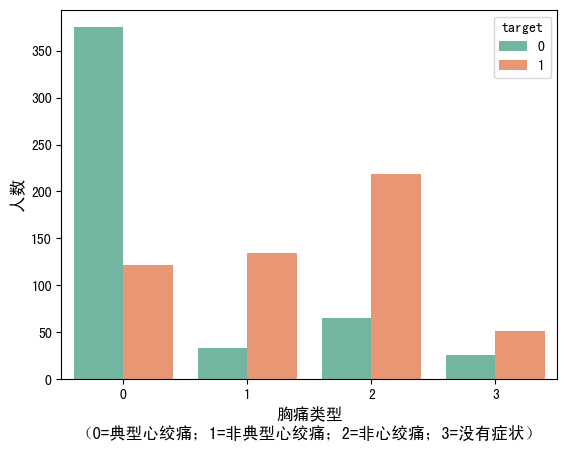

In [101]:
cpDf = heart[['cp','target']]
sns.countplot(data = cpDf,x ='cp',hue='target',palette='Set2')
plt.xlabel('胸痛类型\n（0=典型心绞痛；1=非典型心绞痛；2=非心绞痛；3=没有症状）',fontsize=12)
plt.ylabel('人数',fontsize=12)
plt.show()

Вызывает ли физическая нагрузка стенокардию или нет (0=нет, 1=да)

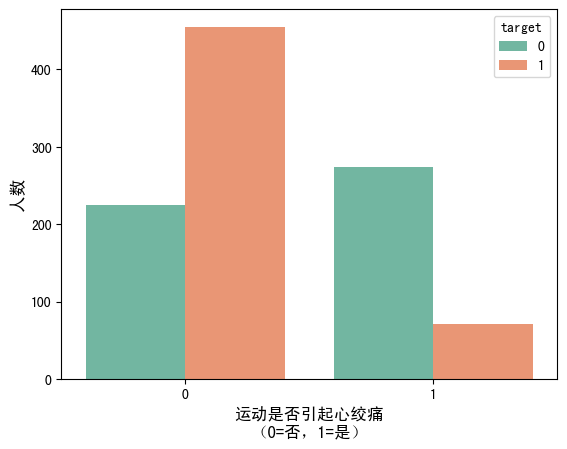

In [102]:
exangDf =  heart[['exang','target']]
sns.countplot(data=exangDf,x='exang',hue='target',palette='Set2')
plt.xlabel('运动是否引起心绞痛\n（0=否，1=是）',fontsize=12)
plt.ylabel('人数',fontsize=12)
plt.show()

年龄-心率-患病三者关系

Взаимосвязь между возрастом, сердечным ритмом и заболеванием

x-возраст, y-максимальная частота сердечных сокращений
Красный цвет означает, что вы больны. Голубой цвет означает, что вы не больны.

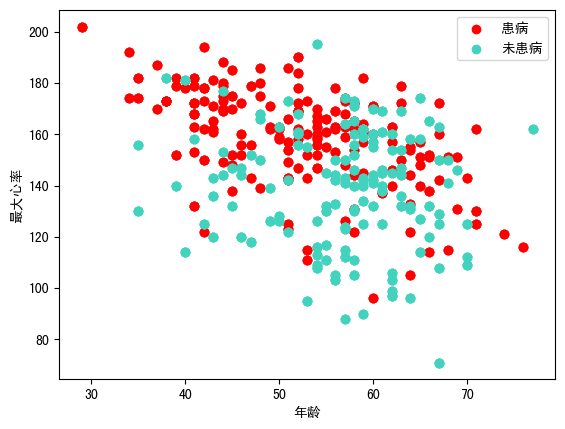

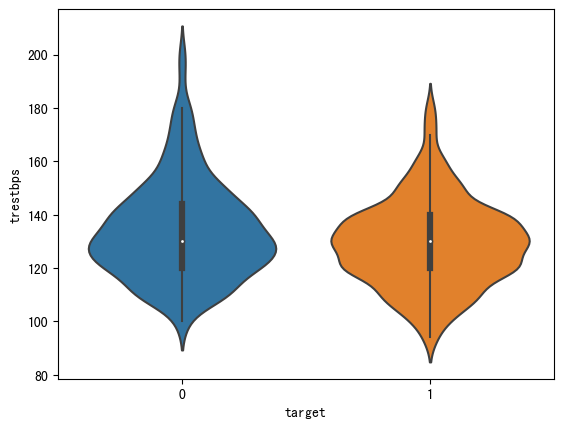

In [103]:
#  散点图
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)], c='#41D3BD')
plt.legend(["患病", "未患病"])
plt.xlabel("年龄")
plt.ylabel("最大心率")
plt.show()
# 再画个提琴图
sns.violinplot(x=heart.target,y=heart.trestbps,data=heart)
plt.show()

大血管数量和血压、患病关系


Взаимосвязь между количеством крупных кровеносных сосудов и артериальным давлением и заболеваниями

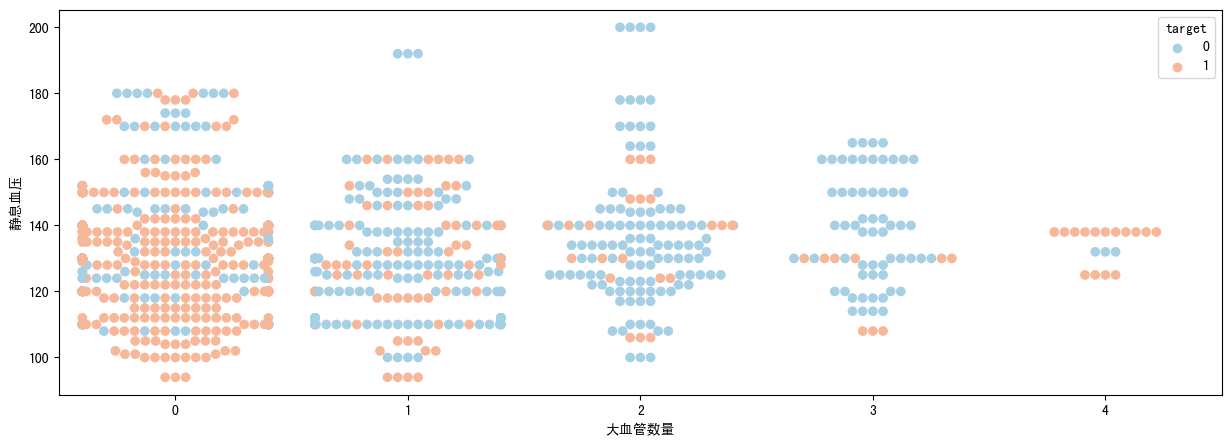

In [104]:
plt.figure(figsize=(15,5))
sns.swarmplot(y='trestbps',data=heart,x='ca',hue='target',palette='RdBu_r',size=7)
plt.xlabel('大血管数量')
plt.ylabel('静息血压')
plt.show()


年龄和胆固醇和患病的关系

Взаимосвязь между возрастом, уровнем холестерина и заболеваниями

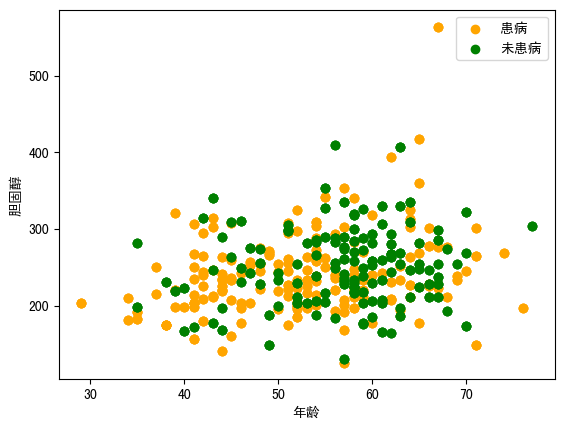

<Axes: xlabel='target', ylabel='chol'>

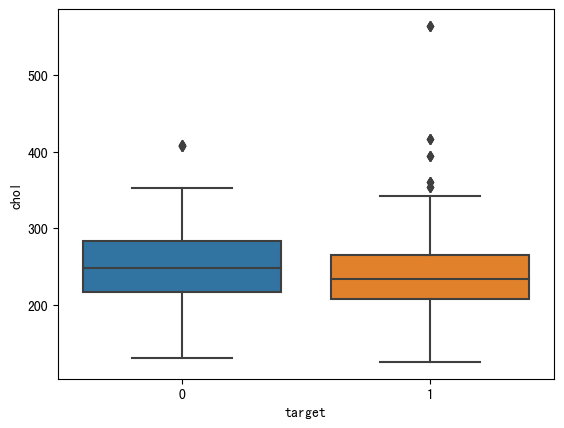

In [105]:

plt.scatter(x=heart.age[heart.target==1], y=heart.chol[heart.target==1], c="orange")
plt.scatter(x=heart.age[heart.target==0], y=heart.chol[heart.target==0], c="green")
plt.legend(["患病",'未患病'])
plt.xlabel("年龄")
plt.ylabel("胆固醇")
plt.show()
# 箱型图
sns.boxplot(x=heart.target,y=heart.chol,data=heart)


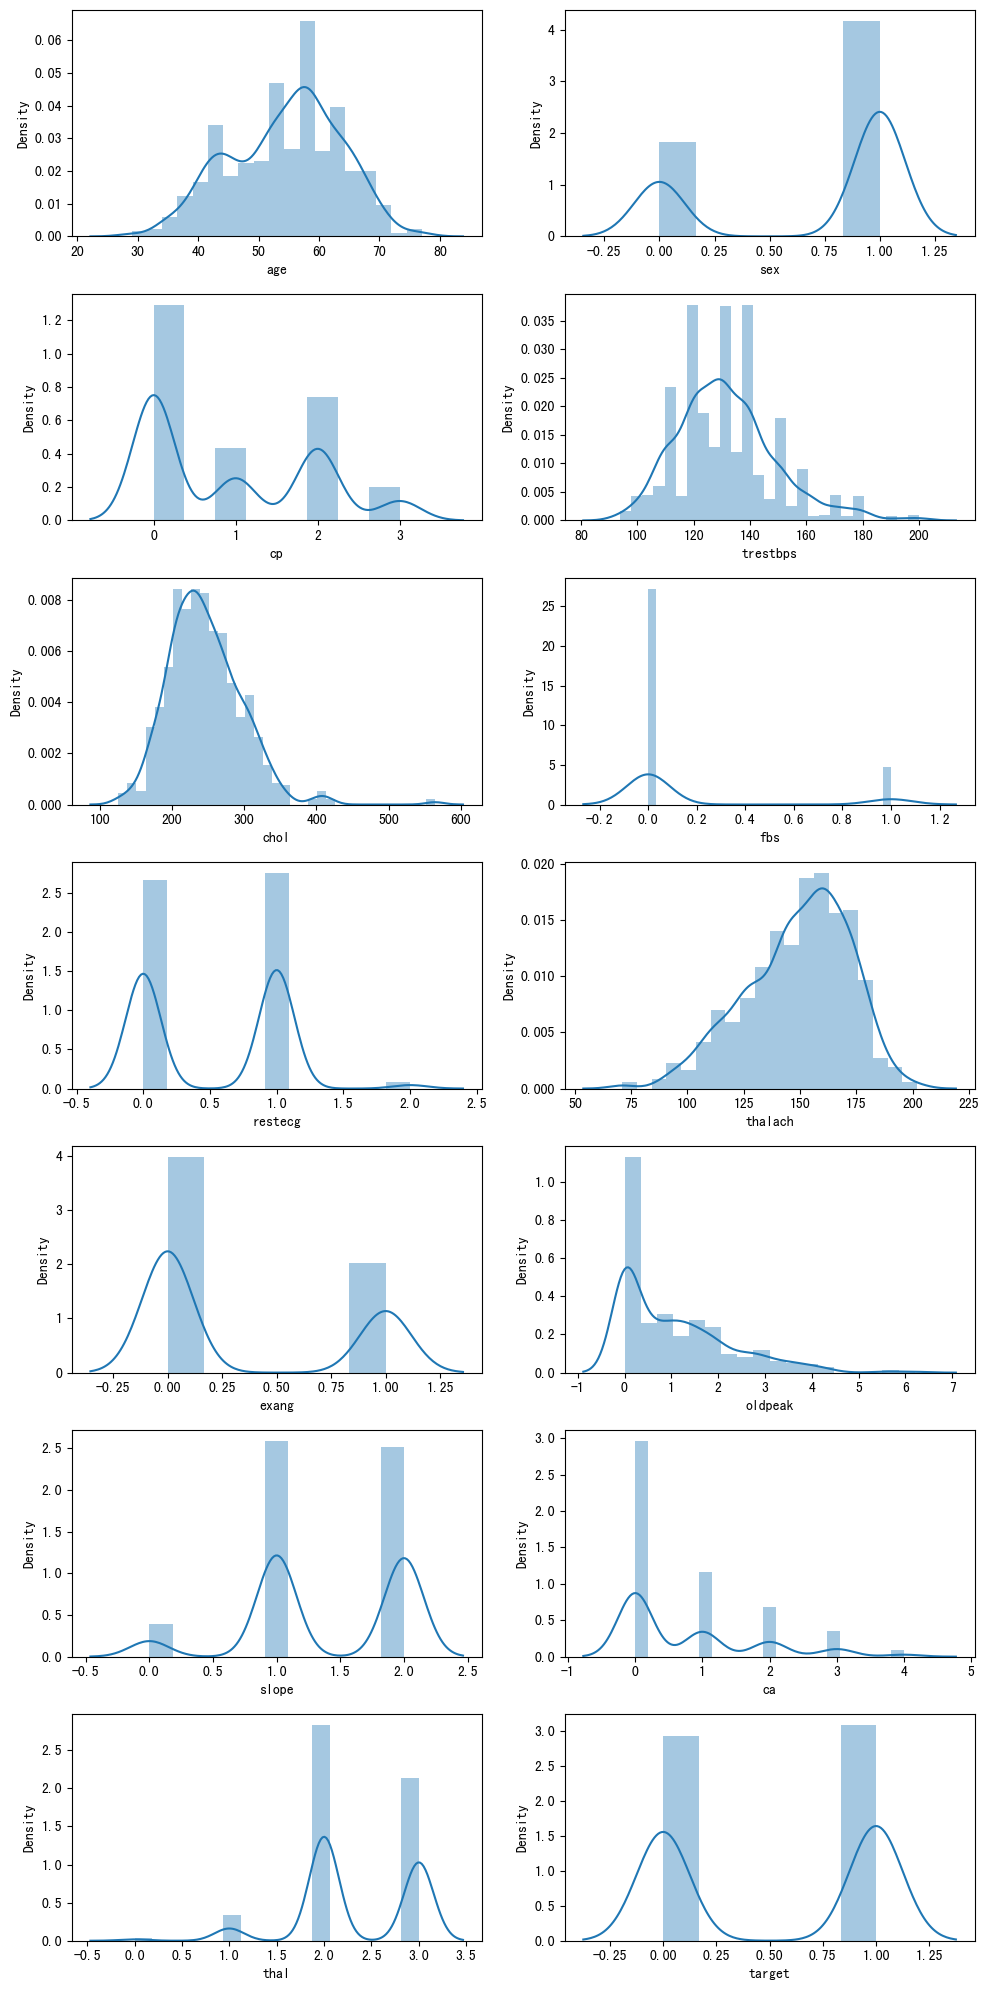

In [106]:
# 统一看下所有特征的分布情况
fig,axes = plt.subplots(7,2,figsize=(10,20))
for x in range(0,14):
    plt.subplot(7,2,x+1)
    sns.distplot(heart.iloc[:,x],kde=True)
plt.tight_layout()
plt.show()
# Рассмотрим распределение всех признаков равномерно

(14.5, -0.5)

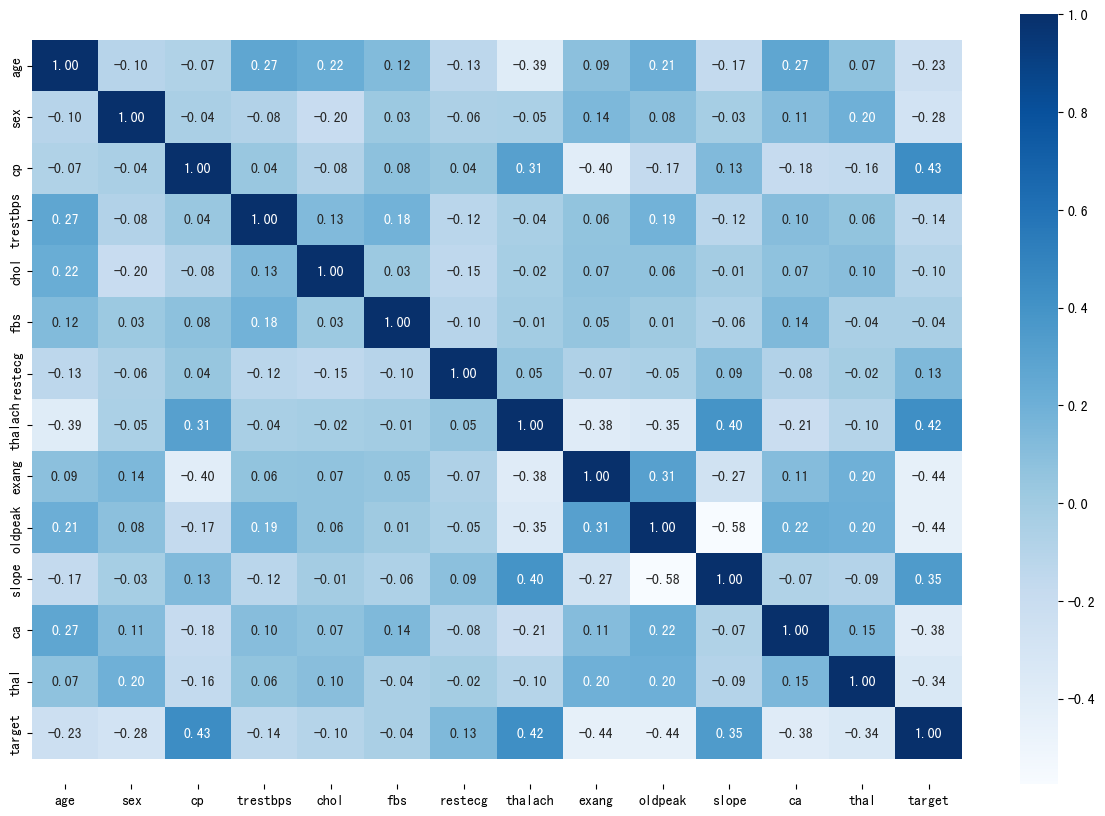

In [107]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(heart.corr(),cmap="Blues",annot=True ,fmt='.2f')
a,b =ax.get_ylim()
ax.set_ylim(a+0.5,b-0.5)

# **特征工程**

feature engineering



Непрерывные категориальные данные, обработанные с использованием кодировки get_dummies()

Удалить из исходных данных столбцы с уникальным тепловым кодом

In [108]:
# 采用get_dummies()编码方式处理非连续性分类数据

cp_dummies= pd.get_dummies(heart['cp'],prefix = 'cp')
restecg_dummies =  pd.get_dummies(heart['restecg'],prefix='restecg')
slope_dummies =  pd.get_dummies(heart['slope'],prefix='slope')
thal_dummies = pd.get_dummies(heart['thal'],prefix='thal')

# 将原数据中经过独热编码的列删除
heart_new =  heart.drop(['cp','restecg','slope','thal'],axis=1)
heart_new = pd.concat([heart_new,cp_dummies,restecg_dummies,slope_dummies,thal_dummies],axis=1)
heart_new.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,1,0,0,0,1,0


In [109]:

features = heart_new.drop(columns=['target'])
targets = heart_new['target']

features.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,age_states,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,middle ages,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,middle ages,...,1,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,old ages,...,0,1,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,old ages,...,0,1,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,3,old ages,...,0,1,0,0,1,0,0,0,1,0


**масштабирования данных**

In [110]:
features = pd.get_dummies(features)
features_temp = StandardScaler().fit_transform(features)


train_data,test_data,train_target,test_target = train_test_split(features_temp,targets,test_size=0.25,random_state=42)


**выбор признаков**

In [111]:
selector1 = RFECV(LogisticRegression(), step=1, cv=5)
selector1 = selector1.fit(train_data, train_target)

train_data_pd = pd.DataFrame(train_data, columns=features.columns)
features_rfecv=list(train_data_pd.columns[selector1.support_])
print("最好的特征排序: %s" % selector1.ranking_)
print("最好的特征 : " , features_rfecv)

最好的特征排序: [1 1 1 1 8 1 1 1 1 1 4 1 1 6 3 5 7 1 2 1 1 1 1 1 1 1]
最好的特征 :  ['age', 'sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_2', 'cp_3', 'slope_1', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'age_states_middle ages', 'age_states_old ages', 'age_states_young ages']


In [112]:
train_data=train_data_pd[features_rfecv]
test_data_pd = pd.DataFrame(test_data, columns=features.columns)
test_data=test_data_pd[features_rfecv]
train_data.head()
test_data.head()

,age,sex,trestbps,chol,thalach,exang,oldpeak,ca,cp_0,cp_2,cp_3,slope_1,thal_0,thal_1,thal_2,thal_3,age_states_middle ages,age_states_old ages,age_states_young ages
0,0.834359,-1.511706,-0.434752,-0.717508,0.603877,-0.712287,-0.912329,-0.731971,1.030715,-0.619085,-0.284998,-0.942158,-0.082923,-0.258065,0.940314,-0.816497,-0.831516,0.931145,-0.242661
1,-0.158157,-1.511706,-0.206287,-0.581764,-1.483579,-0.712287,-0.912329,-0.731971,-0.970200,1.615288,-0.284998,-0.942158,12.059377,-0.258065,-1.063474,-0.816497,1.202622,-1.073947,-0.242661
2,0.062402,0.661504,1.621431,0.833861,-0.178919,1.403928,-0.231177,0.238625,1.030715,-0.619085,-0.284998,1.061393,-0.082923,-0.258065,-1.063474,1.224745,-0.831516,0.931145,-0.242661
3,-0.488996,-1.511706,-0.663216,-0.038784,0.560389,-0.712287,0.024256,-0.731971,-0.970200,-0.619085,-0.284998,-0.942158,-0.082923,-0.258065,0.940314,-0.816497,1.202622,-1.073947,-0.242661
4,-0.709555,0.661504,-0.092055,0.193921,0.038525,1.403928,-0.912329,1.209221,1.030715,-0.619085,-0.284998,-0.942158,-0.082923,-0.258065,-1.063474,1.224745,1.202622,-1.073947,-0.242661


# **切分数据，寻找最佳超参数和训练**

**Нарезка данных для поиска наилучших гиперпараметров и обучения**

**Самостоятельно реализованная логистическая регрессия и деревья решений**

In [113]:
class logistic_regression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization

    def get_params(self, deep=True):
        return {'learning_rate': self.learning_rate, 'num_iterations': self.num_iterations, 'regularization': self.regularization}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.regularization * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [114]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def get_params(self, deep=True):
        return {'max_depth': self.max_depth, 'min_samples_split': self.min_samples_split}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= self.min_samples_split:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

 **Поиск оптимальных гиперпараметров**

In [115]:

log_reg= LogisticRegression()


param_test =  {'penalty':['l2','l1'],
                'C':[0.01,0.1,1.0,10,100],
                'class_weight':[None,'balanced']}
log_gv =  GridSearchCV(log_reg,param_grid=param_test,cv=StratifiedKFold(5),verbose=51,n_jobs=-1)
log_gv.fit(train_data,train_target)

# 最优模型参数
print(log_gv.best_params_)

best_c_log=log_gv.best_params_['C']
best_class_weight=log_gv.best_params_['class_weight']
best_penalty=log_gv.best_params_['penalty']





Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}


In [116]:
knn =  KNeighborsClassifier()

param_test =  [
    {'n_neighbors':[i for i in range(1,21)],
    'weights':['uniform'],
    'p':[i for i in range(1,6)]},

    {'n_neighbors':[i for i in range(1,21)],
    'weights':['distance'],
    'p':[i for i in range(1,6)]}
]
knn_gv = GridSearchCV(knn,param_grid=param_test,cv=StratifiedKFold(5),verbose=51,n_jobs=-1)
knn_gv.fit(train_data,train_target)

# 最优参数
print(knn_gv.best_params_)

best_n_neighbors=knn_gv.best_params_['n_neighbors']
best_p=knn_gv.best_params_['p']
best_weights=knn_gv.best_params_['weights']



Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'n_neighbors': 13, 'p': 4, 'weights': 'distance'}


In [117]:

tree = DecisionTreeClassifier()
param_test={'max_features':['auto','sqrt','log2'],
            'min_samples_split':list(range(2,20)),
            'min_samples_leaf':list(range(1,12)),
            'criterion':["gini", "entropy", "log_loss"],
            'splitter':["best", "random"],
            'max_depth' : [2, 3, 4, 5, 10, 20]
}
tree_gv = GridSearchCV(tree,param_grid=param_test,cv=StratifiedKFold(5),n_jobs=-1)
tree_gv.fit(train_data,train_target)


print(tree_gv.best_params_)
best_max_features=tree_gv.best_params_['max_features']
best_min_samples_split=tree_gv.best_params_['min_samples_split']
best_min_samples_leaf=tree_gv.best_params_['min_samples_leaf']
best_criterion =tree_gv.best_params_['criterion']
best_splitter=tree_gv.best_params_['splitter']
best_max_depth =tree_gv.best_params_['max_depth']




{'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [118]:

svm=SVC(random_state=13)
param_test = {"kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1],
        "C": [0.1, 0.25, 0.5, 0.75, 1, 2]
             }
svm_gv = GridSearchCV(svm, cv=StratifiedKFold(5),param_grid=param_test,verbose=5, n_jobs=-1)
svm_gv.fit(train_data, train_target)
print(svm_gv.best_params_)
best_c=svm_gv.best_params_['C']
best_gamma=svm_gv.best_params_['gamma']
best_kernel=svm_gv.best_params_['kernel']


Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [119]:
# 贝叶斯
gb=GaussianNB()
param_test = [{"priors": [[0.5, 0.5], [0.33, 0.67], [0.67, 0.33], [0.25, 0.75], [0.75, 0.25]],
               "var_smoothing": np.logspace(0, -10, num=100)},
              ]
gb_gv = GridSearchCV(gb, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=23), return_train_score=True,param_grid=param_test,n_jobs=-1)

gb_gv.fit(train_data, train_target)
print(gb_gv.best_params_)
best_priors=gb_gv.best_params_["priors"]
best_var_smoothing=gb_gv.best_params_["var_smoothing"]

{'priors': [0.5, 0.5], 'var_smoothing': 1.0}


In [120]:



param_test = {
    'learning_rate': [0.001,0.005,0.01,0.05, 0.1, 1],
    'num_iterations': [10,100,500,1000],
    'regularization': [0.01, 0.1, 1]
}

lr = logistic_regression()
lr_gv = GridSearchCV(lr, param_test, cv=StratifiedKFold(5),scoring='accuracy',verbose=5, n_jobs=-1)
lr_gv.fit(train_data.to_numpy(), train_target.to_numpy())

print(lr_gv.best_params_)

best_learning_rate_new=lr_gv.best_params_['learning_rate']
best_num_iterations_new=lr_gv.best_params_['num_iterations']
best_regularization_new=lr_gv.best_params_['regularization']


Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'learning_rate': 0.005, 'num_iterations': 500, 'regularization': 0.01}


In [121]:

param_test = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4]
}


dt = DecisionTree()


tree_ngv = GridSearchCV(dt, param_grid=param_test,cv=StratifiedKFold(5),scoring='accuracy',verbose=5, n_jobs=-1)

tree_ngv.fit(train_data.to_numpy(), train_target.to_numpy())
best_max_dept=tree_ngv.best_params_['max_depth']
best_min_samples_spli=tree_ngv.best_params_['min_samples_split']
print(tree_ngv.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'max_depth': 5, 'min_samples_split': 2}


**Прогнозирование с оптимальными гиперпараметрами и вывод классификационных отчетов и оценок**

In [122]:
scores = {}
log_n= LogisticRegression(C=best_c_log,class_weight=best_class_weight,penalty=best_penalty)
log_n.fit(train_data, train_target)

pred_y = log_n.predict(test_data)
print(accuracy_score(test_target,pred_y))
print(classification_report(test_target,pred_y))

score=accuracy_score(test_target,pred_y)
scores['逻辑回归_库'] = score

0.8093385214007782
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       132
           1       0.79      0.82      0.81       125

    accuracy                           0.81       257
   macro avg       0.81      0.81      0.81       257
weighted avg       0.81      0.81      0.81       257



In [123]:
knn_n=  KNeighborsClassifier(n_neighbors=best_n_neighbors,p=best_p,weights=best_weights)
knn_n.fit(train_data, train_target)
pred_y = knn_n.predict(test_data)
print(accuracy_score(test_target,pred_y))
print(classification_report(test_target,pred_y))


score=accuracy_score(test_target,pred_y)
scores['k邻近_库'] = score

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       125

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [124]:
svm_n=SVC(random_state=13,C=best_c,gamma=best_gamma,kernel=best_kernel)
svm_n.fit(train_data, train_target)
pred_y = svm_n.predict(test_data)
print(accuracy_score(test_target,pred_y))
print(classification_report(test_target,pred_y))


score=accuracy_score(test_target,pred_y)
scores['svm_库'] =score

0.9299610894941635
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       132
           1       0.92      0.94      0.93       125

    accuracy                           0.93       257
   macro avg       0.93      0.93      0.93       257
weighted avg       0.93      0.93      0.93       257



In [125]:
gb_n=GaussianNB(priors=best_priors,var_smoothing=best_var_smoothing)
gb_n.fit(train_data, train_target)
pred_y = gb_n.predict(test_data)
print(accuracy_score(test_target,pred_y))
print(classification_report(test_target,pred_y))

score=accuracy_score(test_target,pred_y)
scores['朴素贝叶斯_库'] =score

0.8249027237354085
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       132
           1       0.81      0.84      0.82       125

    accuracy                           0.82       257
   macro avg       0.83      0.83      0.82       257
weighted avg       0.83      0.82      0.82       257



In [126]:
tree_n = DecisionTreeClassifier(max_features=best_max_features,
                min_samples_split=best_min_samples_split,
                min_samples_leaf=best_min_samples_leaf,
                criterion=best_criterion,
                splitter=best_splitter,
                max_depth=best_max_depth)

tree_n.fit(train_data, train_target)
pred_y = tree_n.predict(test_data)
print(accuracy_score(test_target,pred_y))
print(classification_report(test_target,pred_y))

score=accuracy_score(test_target,pred_y)
scores['决策树_库'] =score

0.9883268482490273
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [127]:
tree_mine_n = DecisionTree(max_depth=best_max_depth,min_samples_split=best_min_samples_split)
tree_mine_n.fit(train_data.to_numpy(), train_target.to_numpy())
pred_y = tree_mine_n.predict(test_data.to_numpy())
print(accuracy_score(test_target,pred_y))
print(classification_report(test_target,pred_y))


score=accuracy_score(test_target,pred_y)
scores['决策树_自实现'] =score

0.9649805447470817
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       132
           1       1.00      0.93      0.96       125

    accuracy                           0.96       257
   macro avg       0.97      0.96      0.96       257
weighted avg       0.97      0.96      0.96       257



In [128]:

lr_n = logistic_regression(learning_rate=best_learning_rate_new,num_iterations=best_num_iterations_new,regularization=best_regularization_new)
lr_n .fit(train_data.to_numpy(), train_target.to_numpy())
pred_y = lr_n .predict(test_data)
print(accuracy_score(test_target,pred_y))
print(classification_report(test_target,pred_y))


score=accuracy_score(test_target,pred_y)
scores['逻辑回归_自实现'] =score

0.8249027237354085
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       132
           1       0.80      0.86      0.83       125

    accuracy                           0.82       257
   macro avg       0.83      0.83      0.82       257
weighted avg       0.83      0.82      0.82       257



**проводить сравнение**

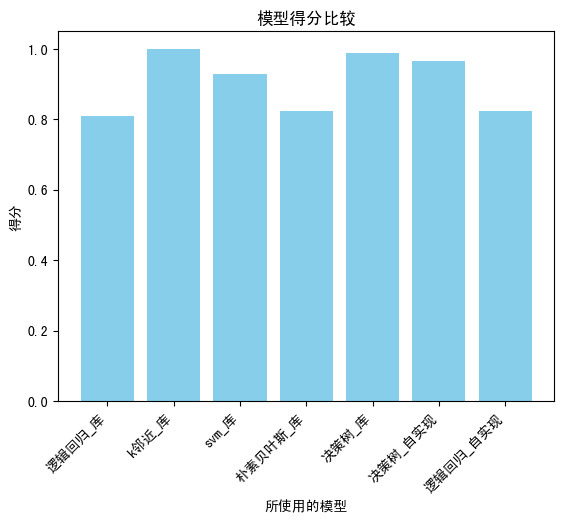

In [129]:
model = list(scores.keys())
values = list(scores.values())

plt.bar(model, values, color='skyblue')

plt.title('模型得分比较')
plt.xlabel('所使用的模型')
plt.ylabel('得分')

plt.xticks(rotation=45, ha='right')

plt.show()

**confusion matrices**

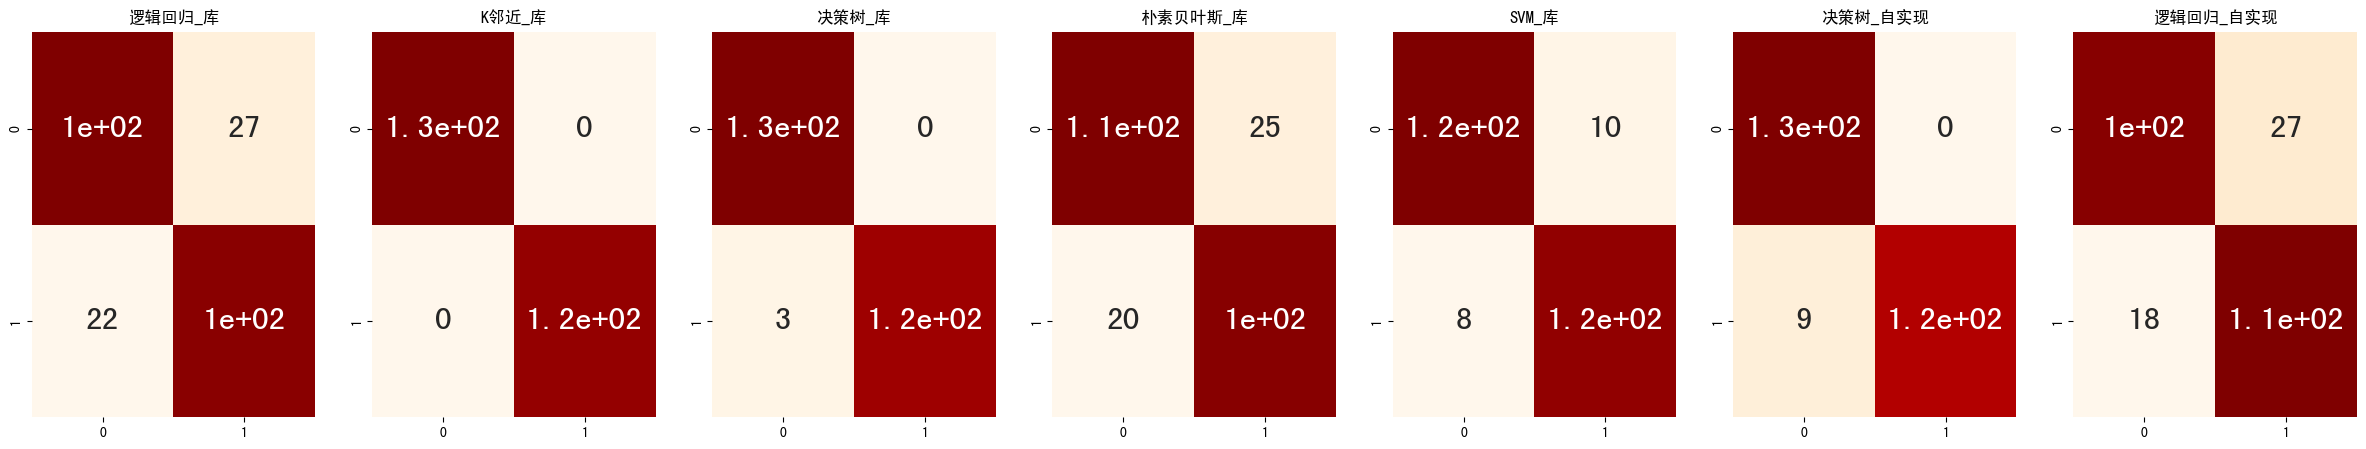

In [130]:

from sklearn.metrics import roc_auc_score,confusion_matrix
i=1
fig1= plt.figure(figsize=(5*6,1*5))

estimator_dict={'逻辑回归_库':log_n,'K邻近_库':knn_n,'决策树_库':tree_n,'朴素贝叶斯_库':gb_n,'SVM_库':svm_n,'决策树_自实现':tree_mine_n,'逻辑回归_自实现':lr_n}
for key,estimator in estimator_dict.items():
    # 绘制混淆矩阵
    pred_y =  estimator.predict(test_data.to_numpy())
    matrix = pd.DataFrame(confusion_matrix(test_target,pred_y))
    ax1 = fig1.add_subplot(1,7,i)
    sns.heatmap(matrix,annot=True,cmap='OrRd',cbar=False,annot_kws={"size": 24})
    plt.title(key)
    i+=1
plt.show()

**вывод**

для этих данных оценки библиотек для всех самостоятельно реализованных деревьев решений с логистической регрессией и sklearn различались незначительно, и все классификаторы в основном набрали более 0,8 балла, причем самым высоким оказался k-neighbourhood regression.